In [1]:
import pandas as pd
import numpy as np

In [2]:
laptops=pd.read_csv('laptops.csv', encoding="latin-1", index_col=0)

In [3]:
laptops

Model Name            Category  \
Manufacturer                                                                  
Apple                                       MacBook Pro           Ultrabook   
Apple                                       Macbook Air           Ultrabook   
HP                                               250 G6            Notebook   
Apple                                       MacBook Pro           Ultrabook   
Apple                                       MacBook Pro           Ultrabook   
Acer                                           Aspire 3            Notebook   
Apple                                       MacBook Pro           Ultrabook   
Apple                                       Macbook Air           Ultrabook   
Asus                                    ZenBook UX430UN           Ultrabook   
Acer                                            Swift 3           Ultrabook   
HP                                               250 G6            Notebook   
HP                                               250 G6            Notebook   
Apple                                       MacBook Pro           Ultrabook   
Dell                                      Inspiron 3567            Notebook   
Apple                                       MacBook 12"           Ultrabook   
Apple                                       MacBook Pro           Ultrabook   
Dell                                      Inspiron 3567            Notebook   
Apple                                       MacBook Pro           Ultrabook   
Lenovo                                IdeaPad 320-15IKB            Notebook   
Dell                                             XPS 13           Ultrabook   
Asus                                    Vivobook E200HA             Netbook   
Lenovo                               Legion Y520-15IKBN              Gaming   
HP                                               255 G6            Notebook   
Dell                                      Inspiron 5379  2 in 1 Convertible   
HP              15-BS101nv (i7-8550U/8GB/256GB/FHD/W10)           Ultrabook   
Dell                                      Inspiron 3567            Notebook   
Apple                                       MacBook Air           Ultrabook   
Dell                                      Inspiron 5570            Notebook   
Dell                                      Latitude 5590           Ultrabook   
HP                                          ProBook 470            Notebook   
...                                                 ...                 ...   
HP                  15-AC110nv (i7-6500U/6GB/1TB/Radeon            Notebook   
Asus                X553SA-XX031T (N3050/4GB/500GB/W10)            Notebook   
Asus                               ZenBook UX305CA-UBM1           Ultrabook   
Dell                                      Inspiron 3567            Notebook   
Acer                                     Aspire ES1-531            Notebook   
Dell                                      Inspiron 3552            Notebook   
Lenovo                               IdeaPad Y700-15ISK            Notebook   
HP                                  Pavilion 15-AW003nv            Notebook   
Dell                                      Inspiron 3567            Notebook   
HP                                     Stream 11-Y000na             Netbook   
Asus          X556UJ-XO044T (i7-6500U/4GB/500GB/GeForce            Notebook   
Lenovo                                   Yoga 500-14ISK  2 in 1 Convertible   
Lenovo                                   Yoga 900-13ISK  2 in 1 Convertible   
Lenovo                               IdeaPad 100S-14IBR            Notebook   
HP                  15-AC110nv (i7-6500U/6GB/1TB/Radeon            Notebook   
Asus                X553SA-XX031T (N3050/4GB/500GB/W10)            Notebook   
Asus                               ZenBook UX305CA-UBM1           Ultrabook   
Dell                                      Inspiron 3567            Notebook   
Acer            

1/ Redo the cleaning processes as presented in the data cleaning notebook, that include:
- Clean column names

- Convert RAM, Price, Weight into numerical columns (create new columns)

- Extract CPU speed from CPU column

- Correcting values of os column

- Handle missing values of os_version column

2/ Convert Screen Size column in to numeric and use that column to answer:
- What is the popular screen size ?
- What is the minimum screen size of Ultrabook ?
- What is the average screen size of gaming laptop ?

3/ Extract Screen Resolution (for example 2880x1800), and answer:
- How many laptop has full hd (1920x1080) screen ?
- What is the popular screen resolution of Macbook ?

4/ Using column storage to create 3 new columns named: storage_gb, storage_ssd, storage_hdd. storage_gb stores the volume of the storage. storage_ssd indicates whether a storage is ssd; values of storage_ssd is either 0 or 1 where 1 means the storage device is ssd. storage_hdd indicates whether a storage is hdd; values of storage_hdd is either 0 or 1 where 1 means the storage device is hdd. Use this column to answer:
- How many laptop have ssd storage ? How many laptop have hdd storage ?
- On a same plot, plot a histogram for the volume of ssd storage and a histogram for the volume of hdd storage.

## **Clean column names**

In [4]:
laptops.index

Index(['Apple', 'Apple', 'HP', 'Apple', 'Apple', 'Acer', 'Apple', 'Apple',
       'Asus', 'Acer',
       ...
       'Lenovo', 'HP', 'Dell', 'HP', 'Asus', 'Lenovo', 'Lenovo', 'Lenovo',
       'HP', 'Asus'],
      dtype='object', name='Manufacturer', length=1303)

In [5]:
laptops.columns

Index(['Model Name', 'Category', 'Screen Size', 'Screen', 'CPU', 'RAM',
       ' Storage', 'GPU', 'Operating System', 'Operating System Version',
       'Weight', 'Price (Euros)'],
      dtype='object')

In [6]:
laptops.shape

(1303, 12)

In [7]:
def clean_header_data(s):
    s=s.strip()
    s=s.replace("  ", " ")
    s=s.replace(" ", "_")
    s=s.replace("(","")
    s=s.replace(")", "")
    s=s.lower()
    return s

In [8]:
new_header=(clean_header_data(label) for label in laptops.columns)

In [9]:
laptops.columns=new_header

In [10]:
laptops.index

Index(['Apple', 'Apple', 'HP', 'Apple', 'Apple', 'Acer', 'Apple', 'Apple',
       'Asus', 'Acer',
       ...
       'Lenovo', 'HP', 'Dell', 'HP', 'Asus', 'Lenovo', 'Lenovo', 'Lenovo',
       'HP', 'Asus'],
      dtype='object', name='Manufacturer', length=1303)

In [13]:
laptops.head()

model_name   category screen_size  \
Manufacturer                                       
Apple         MacBook Pro  Ultrabook       13.3"   
Apple         Macbook Air  Ultrabook       13.3"   
HP                 250 G6   Notebook       15.6"   
Apple         MacBook Pro  Ultrabook       15.4"   
Apple         MacBook Pro  Ultrabook       13.3"   

                                          screen                         cpu  \
Manufacturer                                                                   
Apple         IPS Panel Retina Display 2560x1600        Intel Core i5 2.3GHz   
Apple                                   1440x900        Intel Core i5 1.8GHz   
HP                             Full HD 1920x1080  Intel Core i5 7200U 2.5GHz   
Apple         IPS Panel Retina Display 2880x1800        Intel Core i7 2.7GHz   
Apple         IPS Panel Retina Display 2560x1600        Intel Core i5 3.1GHz   

               ram              storage                           gpu  \
Manufacturer                                                            
Apple          8GB            128GB SSD  Intel Iris Plus Graphics 640   
Apple          8GB  128GB Flash Storage        Intel HD Graphics 6000   
HP             8GB            256GB SSD         Intel HD Graphics 620   
Apple         16GB            512GB SSD            AMD Radeon Pro 455   
Apple          8GB            256GB SSD  Intel Iris Plus Graphics 650   

             operating_system operating_system_version  weight price_euros  
Manufacturer                                                                
Apple                   macOS                      NaN  1.37kg     1339,69  
Apple                   macOS                      NaN  1.34kg      898,94  
HP                      No OS                      NaN  1.86kg      575,00  
Apple                   macOS                      NaN  1.83kg     2537,45  
Apple                   macOS                      NaN  1.37kg     1803,60

In [14]:
(list)(new_header)

[]

In [15]:
laptops.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1303 entries, Apple to Asus
Data columns (total 12 columns):
model_name                  1303 non-null object
category                    1303 non-null object
screen_size                 1303 non-null object
screen                      1303 non-null object
cpu                         1303 non-null object
ram                         1303 non-null object
storage                     1303 non-null object
gpu                         1303 non-null object
operating_system            1303 non-null object
operating_system_version    1133 non-null object
weight                      1303 non-null object
price_euros                 1303 non-null object
dtypes: object(12)
memory usage: 132.3+ KB


## **Convert RAM, Price, Weight into numerical columns (create new columns)**

In [16]:
laptops.ram.unique()

array(['8GB', '16GB', '4GB', '2GB', '12GB', '6GB', '32GB', '24GB', '64GB'],
      dtype=object)

In [17]:
laptops.ram.str.slice(0,-2).astype("int")

Manufacturer
Apple      8
Apple      8
HP         8
Apple     16
Apple      8
Acer       4
Apple     16
Apple      8
Asus      16
Acer       8
HP         4
HP         4
Apple     16
Dell       4
Apple      8
Apple      8
Dell       8
Apple     16
Lenovo     8
Dell       8
Asus       2
Lenovo     8
HP         4
Dell       8
HP         8
Dell       4
Apple      8
Dell       8
Dell       8
HP         8
          ..
HP         6
Asus       4
Asus       8
Dell       6
Acer       4
Dell       2
Lenovo     8
HP         6
Dell       8
HP         2
Asus       4
Lenovo     4
Lenovo    16
Lenovo     2
HP         6
Asus       4
Asus       8
Dell       6
Acer       4
Dell       2
Lenovo     8
HP         6
Dell       8
HP         2
Asus       4
Lenovo     4
Lenovo    16
Lenovo     2
HP         6
Asus       4
Name: ram, Length: 1303, dtype: int32

In [18]:
laptops["ram_num"]=laptops.ram.str.slice(0,-2).astype("int")

In [19]:
laptops.head()

model_name   category screen_size  \
Manufacturer                                       
Apple         MacBook Pro  Ultrabook       13.3"   
Apple         Macbook Air  Ultrabook       13.3"   
HP                 250 G6   Notebook       15.6"   
Apple         MacBook Pro  Ultrabook       15.4"   
Apple         MacBook Pro  Ultrabook       13.3"   

                                          screen                         cpu  \
Manufacturer                                                                   
Apple         IPS Panel Retina Display 2560x1600        Intel Core i5 2.3GHz   
Apple                                   1440x900        Intel Core i5 1.8GHz   
HP                             Full HD 1920x1080  Intel Core i5 7200U 2.5GHz   
Apple         IPS Panel Retina Display 2880x1800        Intel Core i7 2.7GHz   
Apple         IPS Panel Retina Display 2560x1600        Intel Core i5 3.1GHz   

               ram              storage                           gpu  \
Manufacturer                                                            
Apple          8GB            128GB SSD  Intel Iris Plus Graphics 640   
Apple          8GB  128GB Flash Storage        Intel HD Graphics 6000   
HP             8GB            256GB SSD         Intel HD Graphics 620   
Apple         16GB            512GB SSD            AMD Radeon Pro 455   
Apple          8GB            256GB SSD  Intel Iris Plus Graphics 650   

             operating_system operating_system_version  weight price_euros  \
Manufacturer                                                                 
Apple                   macOS                      NaN  1.37kg     1339,69   
Apple                   macOS                      NaN  1.34kg      898,94   
HP                      No OS                      NaN  1.86kg      575,00   
Apple                   macOS                      NaN  1.83kg     2537,45   
Apple                   macOS                      NaN  1.37kg     1803,60   

              ram_num  
Manufacturer           
Apple               8  
Apple               8  
HP                  8  
Apple              16  
Apple               8

In [20]:
laptops.dtypes

model_name                  object
category                    object
screen_size                 object
screen                      object
cpu                         object
ram                         object
storage                     object
gpu                         object
operating_system            object
operating_system_version    object
weight                      object
price_euros                 object
ram_num                      int32
dtype: object

In [21]:
laptops.price_euros.str.replace(',','.').astype('float')

Manufacturer
Apple     1339.69
Apple      898.94
HP         575.00
Apple     2537.45
Apple     1803.60
Acer       400.00
Apple     2139.97
Apple     1158.70
Asus      1495.00
Acer       770.00
HP         393.90
HP         344.99
Apple     2439.97
Dell       498.90
Apple     1262.40
Apple     1518.55
Dell       745.00
Apple     2858.00
Lenovo     499.00
Dell       979.00
Asus       191.90
Lenovo     999.00
HP         258.00
Dell       819.00
HP         659.00
Dell       418.64
Apple     1099.00
Dell       800.00
Dell      1298.00
HP         896.00
           ...   
HP         764.00
Asus       369.00
Asus       729.00
Dell       459.00
Acer       289.00
Dell       379.00
Lenovo     899.00
HP         549.99
Dell       805.99
HP         209.00
Asus       720.32
Lenovo     638.00
Lenovo    1499.00
Lenovo     229.00
HP         764.00
Asus       369.00
Asus       729.00
Dell       459.00
Acer       289.00
Dell       379.00
Lenovo     899.00
HP         549.99
Dell       805.99
HP         209.

In [22]:
laptops['price']=laptops.price_euros.str.replace(',','.').astype('float')

In [23]:
laptops.head()

model_name   category screen_size  \
Manufacturer                                       
Apple         MacBook Pro  Ultrabook       13.3"   
Apple         Macbook Air  Ultrabook       13.3"   
HP                 250 G6   Notebook       15.6"   
Apple         MacBook Pro  Ultrabook       15.4"   
Apple         MacBook Pro  Ultrabook       13.3"   

                                          screen                         cpu  \
Manufacturer                                                                   
Apple         IPS Panel Retina Display 2560x1600        Intel Core i5 2.3GHz   
Apple                                   1440x900        Intel Core i5 1.8GHz   
HP                             Full HD 1920x1080  Intel Core i5 7200U 2.5GHz   
Apple         IPS Panel Retina Display 2880x1800        Intel Core i7 2.7GHz   
Apple         IPS Panel Retina Display 2560x1600        Intel Core i5 3.1GHz   

               ram              storage                           gpu  \
Manufacturer                                                            
Apple          8GB            128GB SSD  Intel Iris Plus Graphics 640   
Apple          8GB  128GB Flash Storage        Intel HD Graphics 6000   
HP             8GB            256GB SSD         Intel HD Graphics 620   
Apple         16GB            512GB SSD            AMD Radeon Pro 455   
Apple          8GB            256GB SSD  Intel Iris Plus Graphics 650   

             operating_system operating_system_version  weight price_euros  \
Manufacturer                                                                 
Apple                   macOS                      NaN  1.37kg     1339,69   
Apple                   macOS                      NaN  1.34kg      898,94   
HP                      No OS                      NaN  1.86kg      575,00   
Apple                   macOS                      NaN  1.83kg     2537,45   
Apple                   macOS                      NaN  1.37kg     1803,60   

              ram_num    price  
Manufacturer                    
Apple               8  1339.69  
Apple               8   898.94  
HP                  8   575.00  
Apple              16  2537.45  
Apple               8  1803.60

In [24]:
laptops.weight

Manufacturer
Apple     1.37kg
Apple     1.34kg
HP        1.86kg
Apple     1.83kg
Apple     1.37kg
Acer       2.1kg
Apple     2.04kg
Apple     1.34kg
Asus       1.3kg
Acer       1.6kg
HP        1.86kg
HP        1.86kg
Apple     1.83kg
Dell       2.2kg
Apple     0.92kg
Apple     1.37kg
Dell       2.2kg
Apple     1.83kg
Lenovo     2.2kg
Dell      1.22kg
Asus      0.98kg
Lenovo     2.5kg
HP        1.86kg
Dell      1.62kg
HP        1.91kg
Dell       2.3kg
Apple     1.35kg
Dell       2.2kg
Dell      1.88kg
HP         2.5kg
           ...  
HP        2.19kg
Asus       2.2kg
Asus       1.2kg
Dell       2.3kg
Acer       2.4kg
Dell      2.20kg
Lenovo     2.6kg
HP        2.04kg
Dell       2.3kg
HP        1.17kg
Asus       2.2kg
Lenovo     1.8kg
Lenovo     1.3kg
Lenovo     1.5kg
HP        2.19kg
Asus       2.2kg
Asus       1.2kg
Dell       2.3kg
Acer       2.4kg
Dell      2.20kg
Lenovo     2.6kg
HP        2.04kg
Dell       2.3kg
HP        1.17kg
Asus       2.2kg
Lenovo     1.8kg
Lenovo     1.3kg
L

In [25]:
laptops["weight_num"] = laptops["weight"].str.replace("kg", "").str.replace("s", "").astype("float")

## **Extract CPU speed from CPU column**

In [26]:
laptops["cpu_speed"]=laptops.cpu.str.replace("GHz","").str.extract(" ([0-9\.]*)$").astype("float")

In [27]:
laptops.head()

model_name   category screen_size  \
Manufacturer                                       
Apple         MacBook Pro  Ultrabook       13.3"   
Apple         Macbook Air  Ultrabook       13.3"   
HP                 250 G6   Notebook       15.6"   
Apple         MacBook Pro  Ultrabook       15.4"   
Apple         MacBook Pro  Ultrabook       13.3"   

                                          screen                         cpu  \
Manufacturer                                                                   
Apple         IPS Panel Retina Display 2560x1600        Intel Core i5 2.3GHz   
Apple                                   1440x900        Intel Core i5 1.8GHz   
HP                             Full HD 1920x1080  Intel Core i5 7200U 2.5GHz   
Apple         IPS Panel Retina Display 2880x1800        Intel Core i7 2.7GHz   
Apple         IPS Panel Retina Display 2560x1600        Intel Core i5 3.1GHz   

               ram              storage                           gpu  \
Manufacturer                                                            
Apple          8GB            128GB SSD  Intel Iris Plus Graphics 640   
Apple          8GB  128GB Flash Storage        Intel HD Graphics 6000   
HP             8GB            256GB SSD         Intel HD Graphics 620   
Apple         16GB            512GB SSD            AMD Radeon Pro 455   
Apple          8GB            256GB SSD  Intel Iris Plus Graphics 650   

             operating_system operating_system_version  weight price_euros  \
Manufacturer                                                                 
Apple                   macOS                      NaN  1.37kg     1339,69   
Apple                   macOS                      NaN  1.34kg      898,94   
HP                      No OS                      NaN  1.86kg      575,00   
Apple                   macOS                      NaN  1.83kg     2537,45   
Apple                   macOS                      NaN  1.37kg     1803,60   

              ram_num    price  weight_num  cpu_speed  
Manufacturer                                           
Apple               8  1339.69        1.37        2.3  
Apple               8   898.94        1.34        1.8  
HP                  8   575.00        1.86        2.5  
Apple              16  2537.45        1.83        2.7  
Apple               8  1803.60        1.37        3.1

## **Correcting values of os column**

In [28]:
laptops.operating_system.value_counts()

Windows      1125
No OS          66
Linux          62
Chrome OS      27
macOS          13
Mac OS          8
Android         2
Name: operating_system, dtype: int64

In [29]:
maps={"Windows":"Windows", "No OS": "No OS", "Linux":"Linux", "Chrome OS": "Chorme OS", "macOS": "Mac OS", "Mac OS": "Mac OS","Android":"Android"}

In [30]:
laptops["os"]=laptops.operating_system.map(maps)

## **Handle missing values of os_version column**

In [31]:
laptops.operating_system_version.unique()

array([nan, '10', 'X', '10 S', '7'], dtype=object)

In [32]:
laptops.loc[laptops.operating_system_version.isnull(), 'operating_system'].value_counts()

No OS        66
Linux        62
Chrome OS    27
macOS        13
Android       2
Name: operating_system, dtype: int64

In [33]:
laptops.loc[laptops.os == "No OS", "operating_system_version"] = "Non OS"
laptops.loc[laptops.os == "Mac OS", "operating_system_version"] = "X"

In [35]:
laptops.dropna(inplace=True)

In [36]:
laptops.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1212 entries, Apple to Asus
Data columns (total 17 columns):
model_name                  1212 non-null object
category                    1212 non-null object
screen_size                 1212 non-null object
screen                      1212 non-null object
cpu                         1212 non-null object
ram                         1212 non-null object
storage                     1212 non-null object
gpu                         1212 non-null object
operating_system            1212 non-null object
operating_system_version    1212 non-null object
weight                      1212 non-null object
price_euros                 1212 non-null object
ram_num                     1212 non-null int32
price                       1212 non-null float64
weight_num                  1212 non-null float64
cpu_speed                   1212 non-null float64
os                          1212 non-null object
dtypes: float64(3), int32(1), object(13)
memory usage: 165.

In [37]:
laptops.head()

model_name   category screen_size  \
Manufacturer                                       
Apple         MacBook Pro  Ultrabook       13.3"   
Apple         Macbook Air  Ultrabook       13.3"   
HP                 250 G6   Notebook       15.6"   
Apple         MacBook Pro  Ultrabook       15.4"   
Apple         MacBook Pro  Ultrabook       13.3"   

                                          screen                         cpu  \
Manufacturer                                                                   
Apple         IPS Panel Retina Display 2560x1600        Intel Core i5 2.3GHz   
Apple                                   1440x900        Intel Core i5 1.8GHz   
HP                             Full HD 1920x1080  Intel Core i5 7200U 2.5GHz   
Apple         IPS Panel Retina Display 2880x1800        Intel Core i7 2.7GHz   
Apple         IPS Panel Retina Display 2560x1600        Intel Core i5 3.1GHz   

               ram              storage                           gpu  \
Manufacturer                                                            
Apple          8GB            128GB SSD  Intel Iris Plus Graphics 640   
Apple          8GB  128GB Flash Storage        Intel HD Graphics 6000   
HP             8GB            256GB SSD         Intel HD Graphics 620   
Apple         16GB            512GB SSD            AMD Radeon Pro 455   
Apple          8GB            256GB SSD  Intel Iris Plus Graphics 650   

             operating_system operating_system_version  weight price_euros  \
Manufacturer                                                                 
Apple                   macOS                        X  1.37kg     1339,69   
Apple                   macOS                        X  1.34kg      898,94   
HP                      No OS                   Non OS  1.86kg      575,00   
Apple                   macOS                        X  1.83kg     2537,45   
Apple                   macOS                        X  1.37kg     1803,60   

              ram_num    price  weight_num  cpu_speed      os  
Manufacturer                                                   
Apple               8  1339.69        1.37        2.3  Mac OS  
Apple               8   898.94        1.34        1.8  Mac OS  
HP                  8   575.00        1.86        2.5   No OS  
Apple              16  2537.45        1.83        2.7  Mac OS  
Apple               8  1803.60        1.37        3.1  Mac OS

## **What is the popular screen size**

In [38]:
laptops["screen_size_new"]=laptops.screen_size.str.replace("\"","").astype("float")

In [39]:
laptops

model_name            category  \
Manufacturer                                                                  
Apple                                       MacBook Pro           Ultrabook   
Apple                                       Macbook Air           Ultrabook   
HP                                               250 G6            Notebook   
Apple                                       MacBook Pro           Ultrabook   
Apple                                       MacBook Pro           Ultrabook   
Acer                                           Aspire 3            Notebook   
Apple                                       MacBook Pro           Ultrabook   
Apple                                       Macbook Air           Ultrabook   
Asus                                    ZenBook UX430UN           Ultrabook   
Acer                                            Swift 3           Ultrabook   
HP                                               250 G6            Notebook   
HP                                               250 G6            Notebook   
Apple                                       MacBook Pro           Ultrabook   
Dell                                      Inspiron 3567            Notebook   
Apple                                       MacBook 12"           Ultrabook   
Apple                                       MacBook Pro           Ultrabook   
Dell                                      Inspiron 3567            Notebook   
Apple                                       MacBook Pro           Ultrabook   
Lenovo                                IdeaPad 320-15IKB            Notebook   
Dell                                             XPS 13           Ultrabook   
Asus                                    Vivobook E200HA             Netbook   
Lenovo                               Legion Y520-15IKBN              Gaming   
HP                                               255 G6            Notebook   
Dell                                      Inspiron 5379  2 in 1 Convertible   
HP              15-BS101nv (i7-8550U/8GB/256GB/FHD/W10)           Ultrabook   
Dell                                      Inspiron 3567            Notebook   
Apple                                       MacBook Air           Ultrabook   
Dell                                      Inspiron 5570            Notebook   
Dell                                      Latitude 5590           Ultrabook   
HP                                          ProBook 470            Notebook   
...                                                 ...                 ...   
Asus          X556UJ-XO044T (i7-6500U/4GB/500GB/GeForce            Notebook   
Lenovo                                   Yoga 500-14ISK  2 in 1 Convertible   
Lenovo                                   Yoga 900-13ISK  2 in 1 Convertible   
Lenovo                               IdeaPad 100S-14IBR            Notebook   
HP                  15-AC110nv (i7-6500U/6GB/1TB/Radeon            Notebook   
Asus                X553SA-XX031T (N3050/4GB/500GB/W10)            Notebook   
Asus                               ZenBook UX305CA-UBM1           Ultrabook   
Dell                                      Inspiron 3567            Notebook   
Dell                                      Inspiron 3552            Notebook   
Lenovo                               IdeaPad Y700-15ISK            Notebook   
HP                                  Pavilion 15-AW003nv            Notebook   
HP                                     Stream 11-Y000na             Netbook   
Asus          X556UJ-XO044T (i7-6500U/4GB/500GB/GeForce            Notebook   
Lenovo                                   Yoga 500-14ISK  2 in 1 Convertible   
Lenovo                                   Yoga 900-13ISK  2 in 1 Convertible   
Lenovo                               IdeaPad 100S-14IBR            Notebook   
HP                  15-AC110nv (i7-6500U/6GB/1TB/Radeon            Notebook   
Asus                X553SA-XX031T (N3050/4GB/500GB/W10)            Notebook   
Asus            

In [42]:
laptops.screen_size_new.value_counts().head()

15.6    607
14.0    191
13.3    161
17.3    160
12.5     37
Name: screen_size_new, dtype: int64

## **What is the minimum screen size of Ultrabook ?**

In [48]:
laptops.loc[laptops.category=="Ultrabook","screen_size_new"].min()

11.6

## **What is the average screen size of gaming laptop ?**

In [49]:
laptops.loc[laptops.category=="Gaming", "screen_size_new"].mean()

16.352238805970146

## **How many laptop has full hd (1920x1080) screen ?**

In [50]:
laptops["screen_resolution"] = laptops.screen.str.split().apply(lambda x: x[-1])

In [68]:
(laptops.screen_resolution=="1920x1080").sum()

806

## **What is the popular screen resolution of Macbook ?**

In [51]:
laptops.loc[laptops.model_name.str.contains("MacBook.*"), "screen_resolution"].value_counts().head()

2304x1440    6
2560x1600    6
2880x1800    4
1440x900     2
1366x768     1
Name: screen_resolution, dtype: int64

## **How many laptop have ssd storage ? How many laptop have hdd storage ?**

In [52]:
laptops["storage_gb"] = laptops.storage.str.split().apply(lambda x: x[0]).apply(lambda x: int(x[:-2]) if x.endswith("GB") else int(x[0]) * 1024)

In [53]:
laptops["has_ssd"] = laptops.storage.str.match(".*SSD.*")

In [54]:
laptops["has_hdd"] = laptops.storage.str.match(".*HDD.*")

In [55]:
laptops.has_ssd.sum()

816

In [56]:
laptops.has_hdd.sum()

531

## **On a same plot, plot a histogram for the volume of ssd storage and a histogram for the volume of hdd storage.**

In [57]:
import matplotlib.pyplot as plt

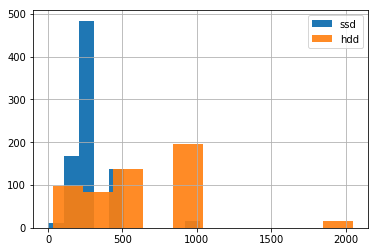

In [58]:
laptops.loc[laptops.has_ssd, "storage_gb"].hist(label='ssd')
laptops.loc[laptops.has_hdd, "storage_gb"].hist(label='hdd', alpha=0.9)
plt.legend()